In [23]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sparse
from scipy.sparse.linalg import eigsh, expm_multiply, expm

In [51]:
import importlib

import sys
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/Chebyshev')
sys.path.append('/Users/Giovanni/Desktop/ResearchJob/Student-Research-Job/TCI')
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/Chebyshev")
sys.path.append("/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI")


import ED_Cs_Lsites as ED
import Chebyshev as Cbs
import TCI_Lsite as TCI

importlib.reload(ED)
importlib.reload(Cbs)
importlib.reload(TCI)

<module 'TCI_Lsite' from '/home/t30/all/go56vod/Desktop/Student-Research-Job/TCI/TCI_Lsite.py'>

### Correlator generalized for L sites

In [52]:
# define Hamiltonian terms
L = 11
n = 11
dt = 1e-2
models = ['J = 1, g = 2 , Ising Model Ham. = H','J =1 g = 2 Ham. = H - k*Hzz', 'J = 1 g = 0.5, Ham. = H - h * Hxx', 'J = 1 g = 0.5, Ham. = H - k*Hzz - h*Hxx']

### TCI interpolation of 4 models

System with 11 sites, Hilbert space dimension is 2048.
err_max:  0.0002804754609009158
err_2:  0.00020506498717021035
eval/D:  840

repeated evaluations:  1460
unique evaluations 840
unique + repeated:  2300
total evaluations:  2300



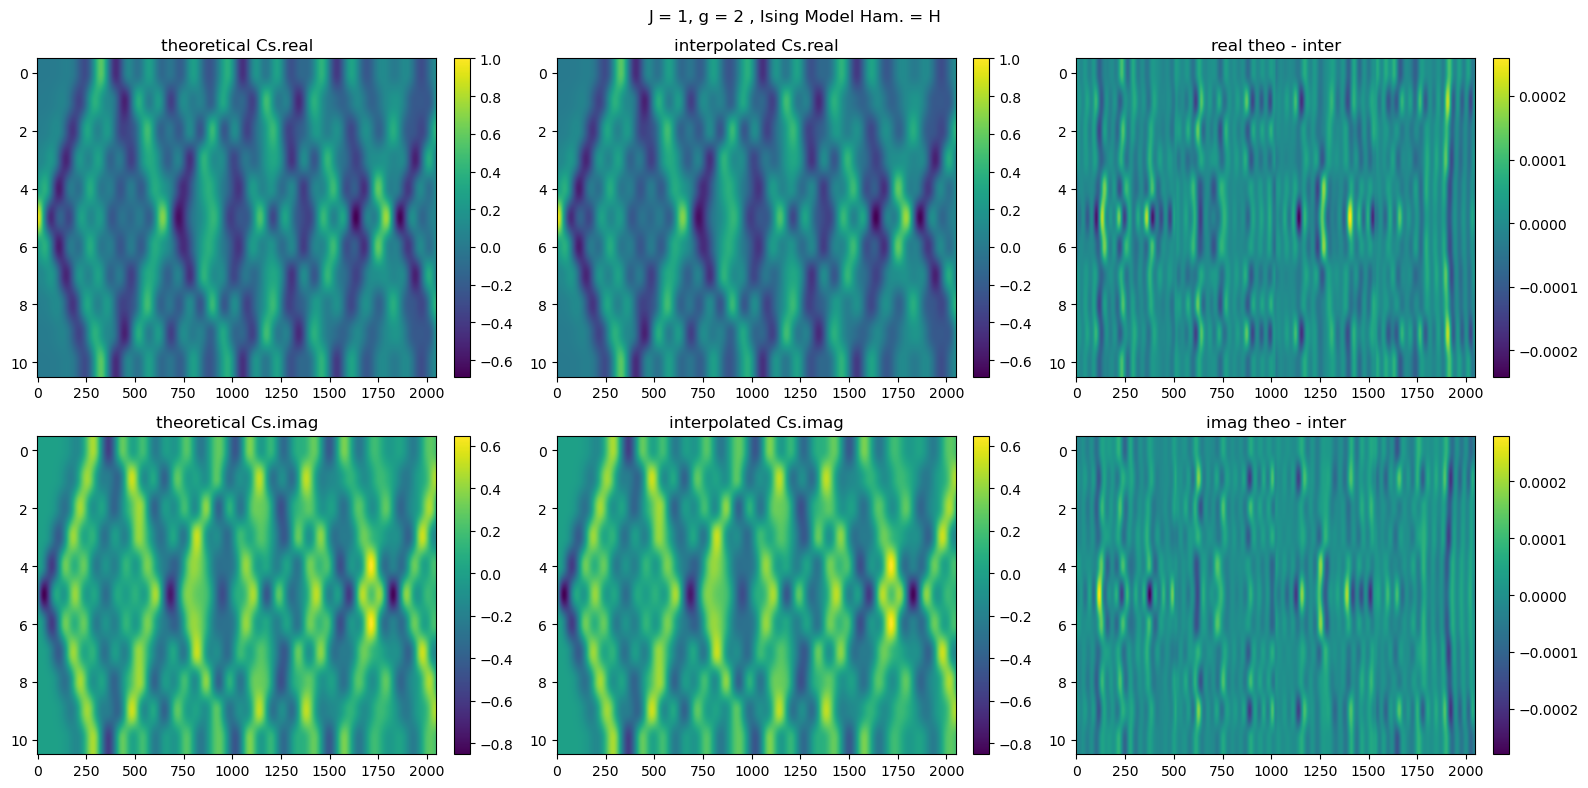

System with 11 sites, Hilbert space dimension is 2048.
err_max:  0.0003706818459549116
err_2:  0.00019440863407166014
eval/D:  892

repeated evaluations:  1408
unique evaluations 892
unique + repeated:  2300
total evaluations:  2300



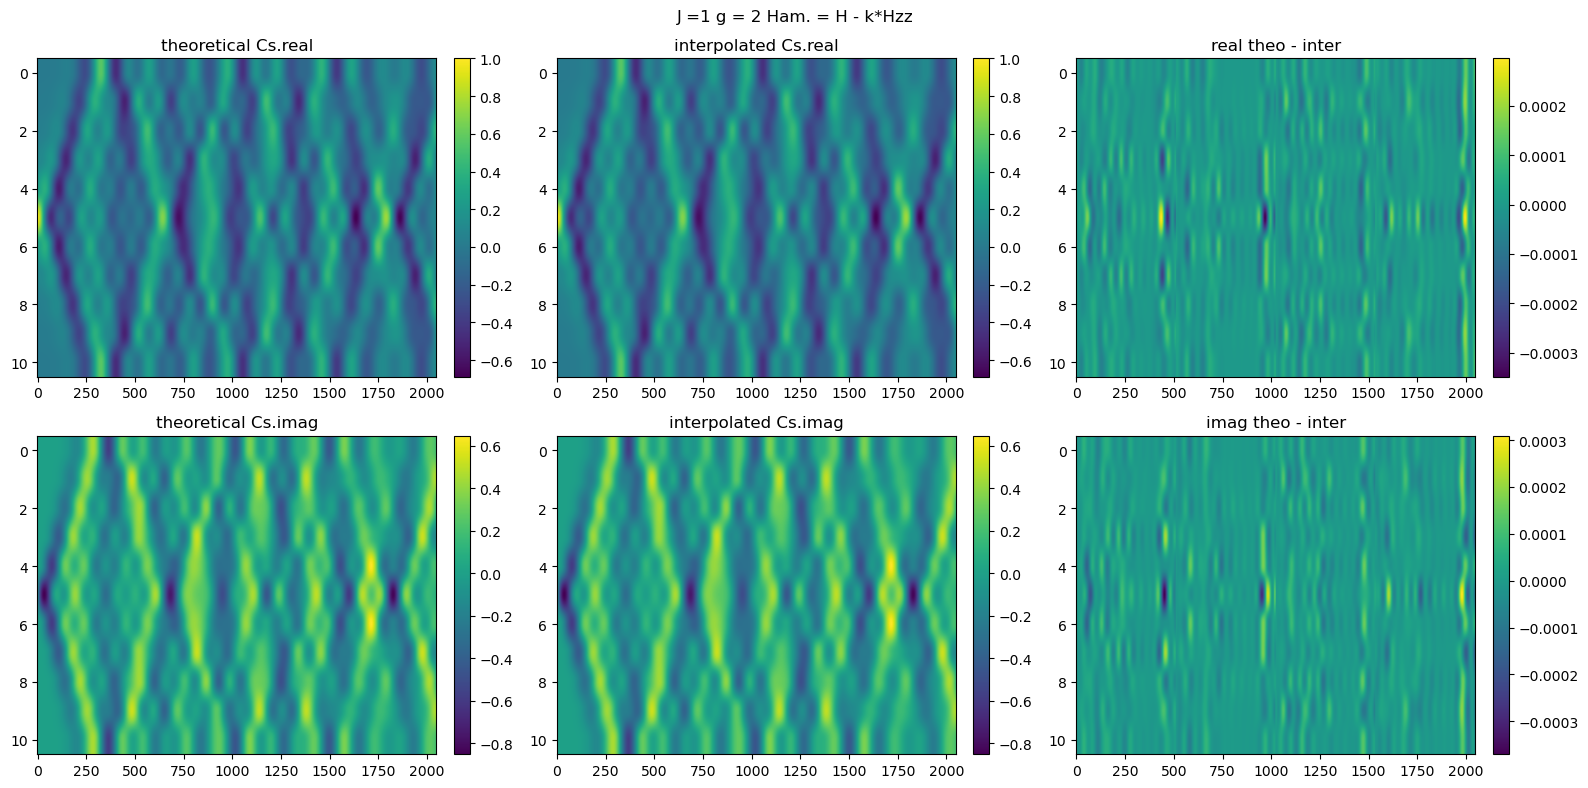

System with 11 sites, Hilbert space dimension is 2048.
err_max:  9.90869722471695e-05
err_2:  8.015539520612998e-05
eval/D:  840

repeated evaluations:  1460
unique evaluations 840
unique + repeated:  2300
total evaluations:  2300



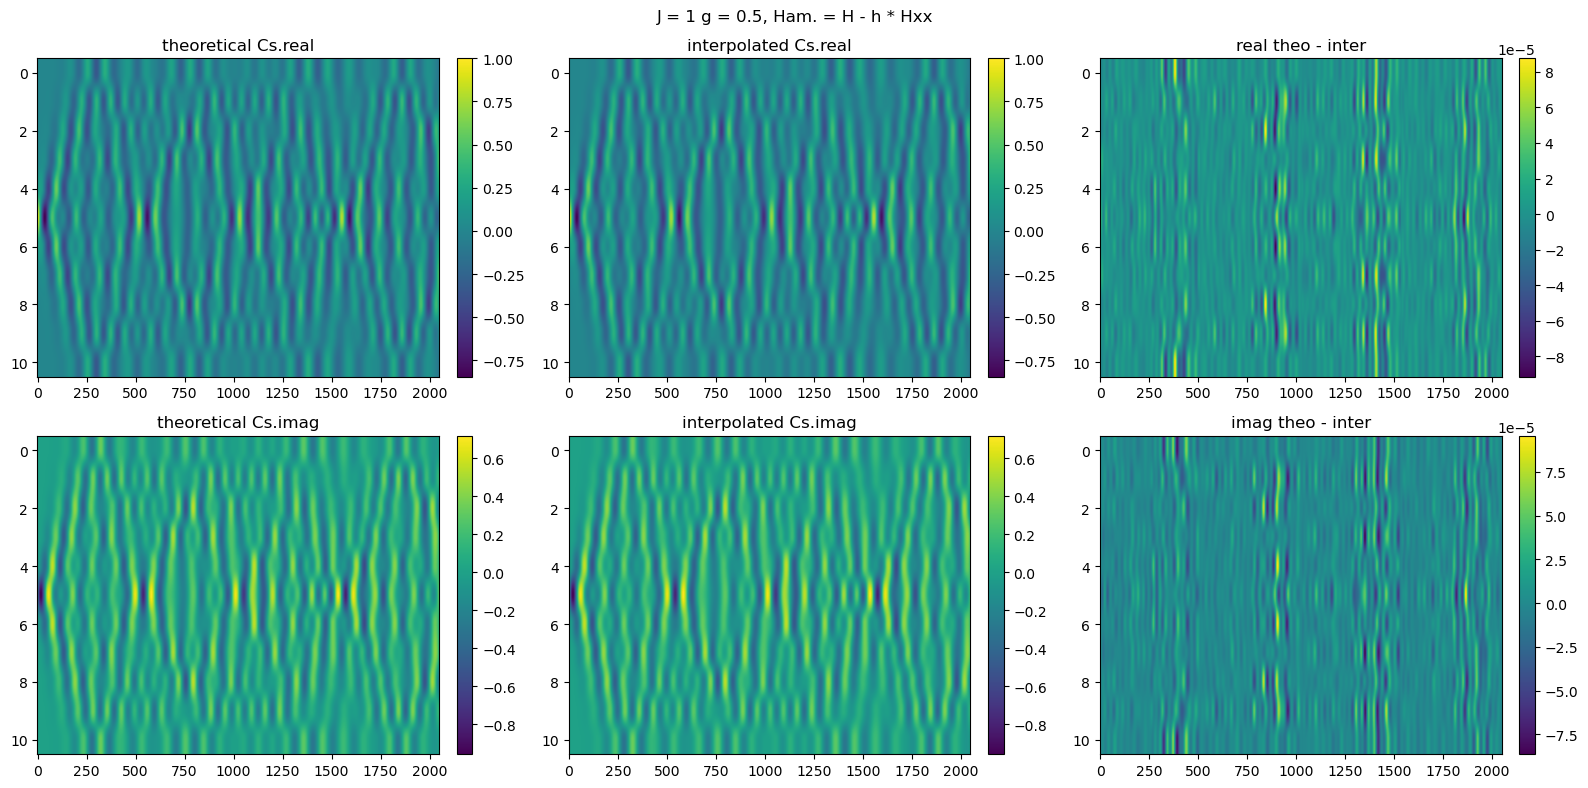

System with 11 sites, Hilbert space dimension is 2048.
err_max:  0.0005599625684383939
err_2:  0.00026871634238193867
eval/D:  840

repeated evaluations:  1460
unique evaluations 840
unique + repeated:  2300
total evaluations:  2300



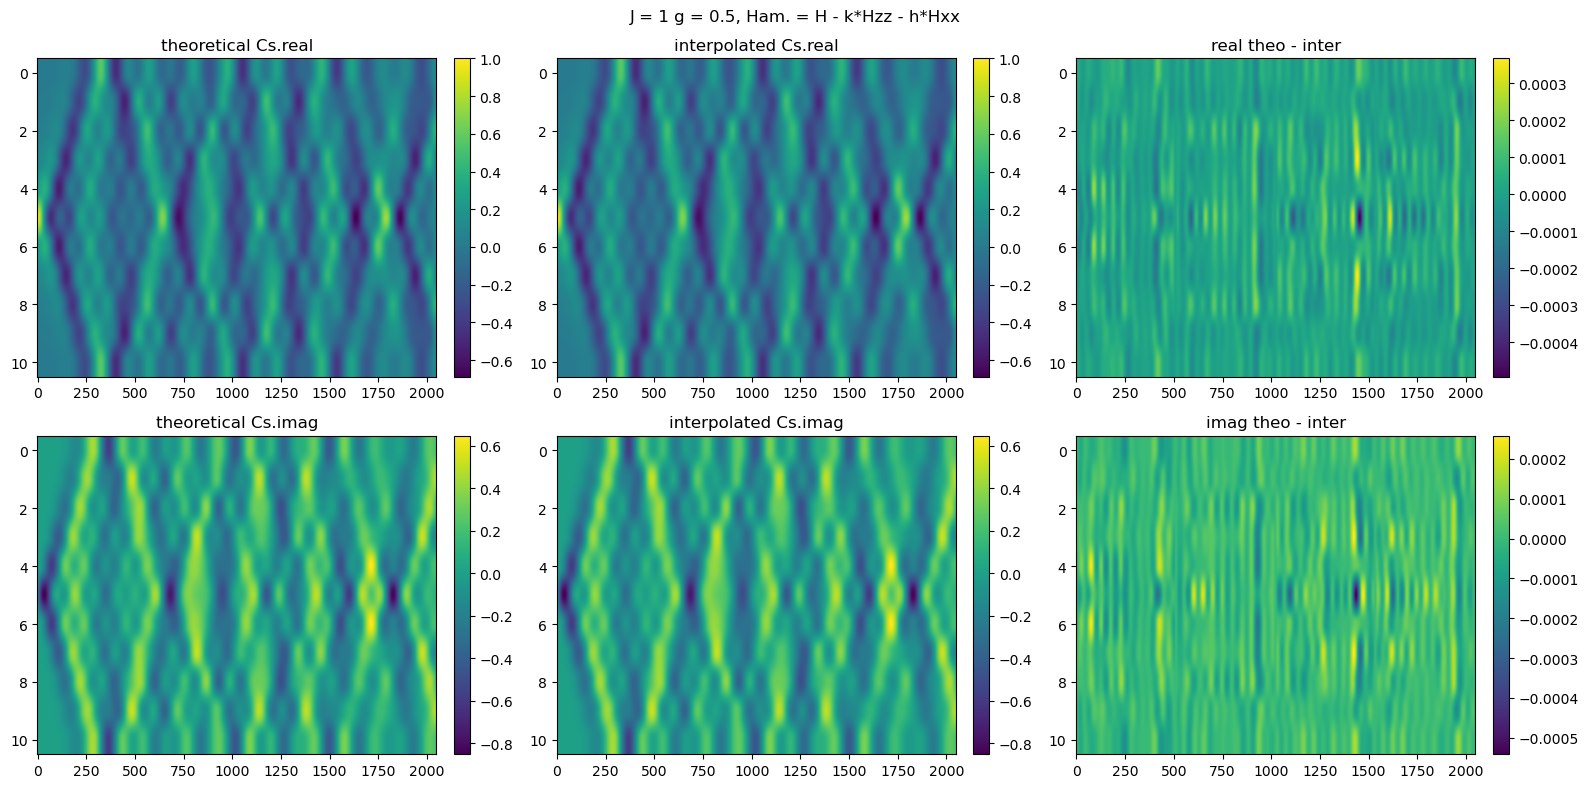

In [ ]:
C = {}
for idx, model in enumerate(models):
    H = ED.gen_Ham(model = idx)
    Cs = ED.correlator(H= H, L = L, dt = dt,  n = n)
    C[f"Cs_{idx}"] = Cs
    D = L

    func_vals = Cs.T #Cs is in the form (X,T)
    f_t = lambda *t: Cs.reshape((D,) + (2,) * n)[:,*t]
    func = TCI.function(f_t)

    As, _, eval, err_2, err_max, func_interp = TCI.tensor_cross_interpolation(func,         # function to be interpolated
                                    func_vals,    
                                    D,
                                    L=n,          # number of MPS tensors
                                    eps_or_chi=10, # bond dimension
                                    iters=1)       # number of back-and-forth sweeps
    rows, cols = 2, 3  # Define grid dimensions
    a, b = Cs.shape
    interp_Cs = func_interp.T.reshape(a, b)

    # Data and titles for each subplot
    data = [
        (Cs.real, 'theoretical Cs.real'),
        (np.real(interp_Cs), 'interpolated Cs.real'),
        (Cs.real - np.real(interp_Cs), 'real theo - inter'),
        (Cs.imag, 'theoretical Cs.imag'),
        (np.imag(interp_Cs), 'interpolated Cs.imag'),
        (Cs.imag - np.imag(interp_Cs), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', 
                        #interpolation='none'
                        )
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)
    fig.suptitle(model)

    plt.tight_layout()
    plt.show()

### Interpolation with Chebyshev

In [ ]:
dt = 1e-2
n = 10

correlator_func = lambda: ED.correlator_Chebyshev(H=H, dt=dt, n=n, D_list=D_list, t_matrix=t_matrix)



for idx, model in enumerate(models):
    H = ED.gen_Ham(model = idx)
    D = L
    Cs = C[f"Cs_{idx}"]
    func_vals = Cs.T #Cs is in the form (X,T)

    # get MPS from Chebyshev interpolation
    chi = 20
    As, evals, err_max, err_2, func_interp = Cbs.Chebyshev_interpolation_Dsite(func(H = H, dt = dt, n =n), # function to be interpolated
                                    func_vals,
                                    L=n,              # number of MPS tensors
                                    D = D,
                                    chi=chi)           # (half of the) bond dimension

        

    rows, cols = 2, 3  # Define grid dimensions
    a, b = Cs.shape
    interp_Cs = func_interp.T.reshape(a, b)

    # Data and titles for each subplot
    data = [
        (Cs.real, 'theoretical Cs.real'),
        (np.real(interp_Cs), 'interpolated Cs.real'),
        (Cs.real - np.real(interp_Cs), 'real theo - inter'),
        (Cs.imag, 'theoretical Cs.imag'),
        (np.imag(interp_Cs), 'interpolated Cs.imag'),
        (Cs.imag - np.imag(interp_Cs), 'imag theo - inter')
    ]

    # Create subplots
    fig, axs = plt.subplots(rows, cols, figsize=(16, 8))

    # Loop through data and subplots
    for ax, (image, title) in zip(axs.flat, data):
        im = ax.imshow(image, aspect='auto', 
                        #interpolation='none'
                        )
        fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
        ax.set_title(title)
    fig.suptitle(model)

    plt.tight_layout()
    plt.show()
# exact function values
#xs = np.linspace(0, N*dt, 2**n, endpoint=False)
ts = np.arange(N)*dt

System with 11 sites, Hilbert space dimension is 2048.


TypeError: func() missing 2 required positional arguments: 'D_list' and 't_matrix'

In [32]:
print(err_2)
print(err_max)

0.006143628457123437
0.005796130657386387


### Color map theoretical Cs vs interpolated Cs

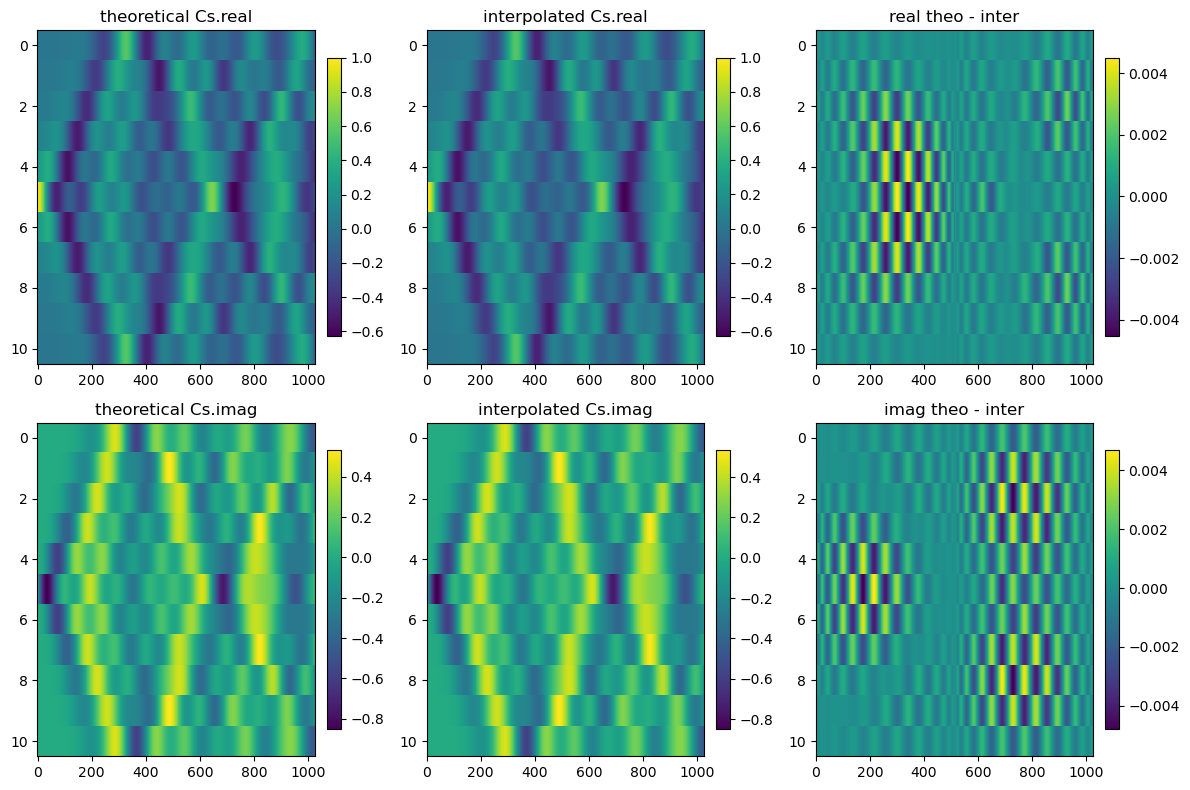

In [34]:
rows, cols = 2, 3  # Define grid dimensions
a, b = Cs.shape
interp_Cs = func_interp.T.reshape(a, b)

# Data and titles for each subplot
data = [
    (Cs.real, 'theoretical Cs.real'),
    (np.real(interp_Cs), 'interpolated Cs.real'),
    (Cs.real - np.real(interp_Cs), 'real theo - inter'),
    (Cs.imag, 'theoretical Cs.imag'),
    (np.imag(interp_Cs), 'interpolated Cs.imag'),
    (Cs.imag - np.imag(interp_Cs), 'imag theo - inter')
]

# Create subplots
fig, axs = plt.subplots(rows, cols, figsize=(12, 8))

# Loop through data and subplots
for ax, (image, title) in zip(axs.flat, data):
    im = ax.imshow(image, aspect='auto', interpolation='none')
    fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)  # Add colorbar
    ax.set_title(title)

plt.tight_layout()
plt.show()

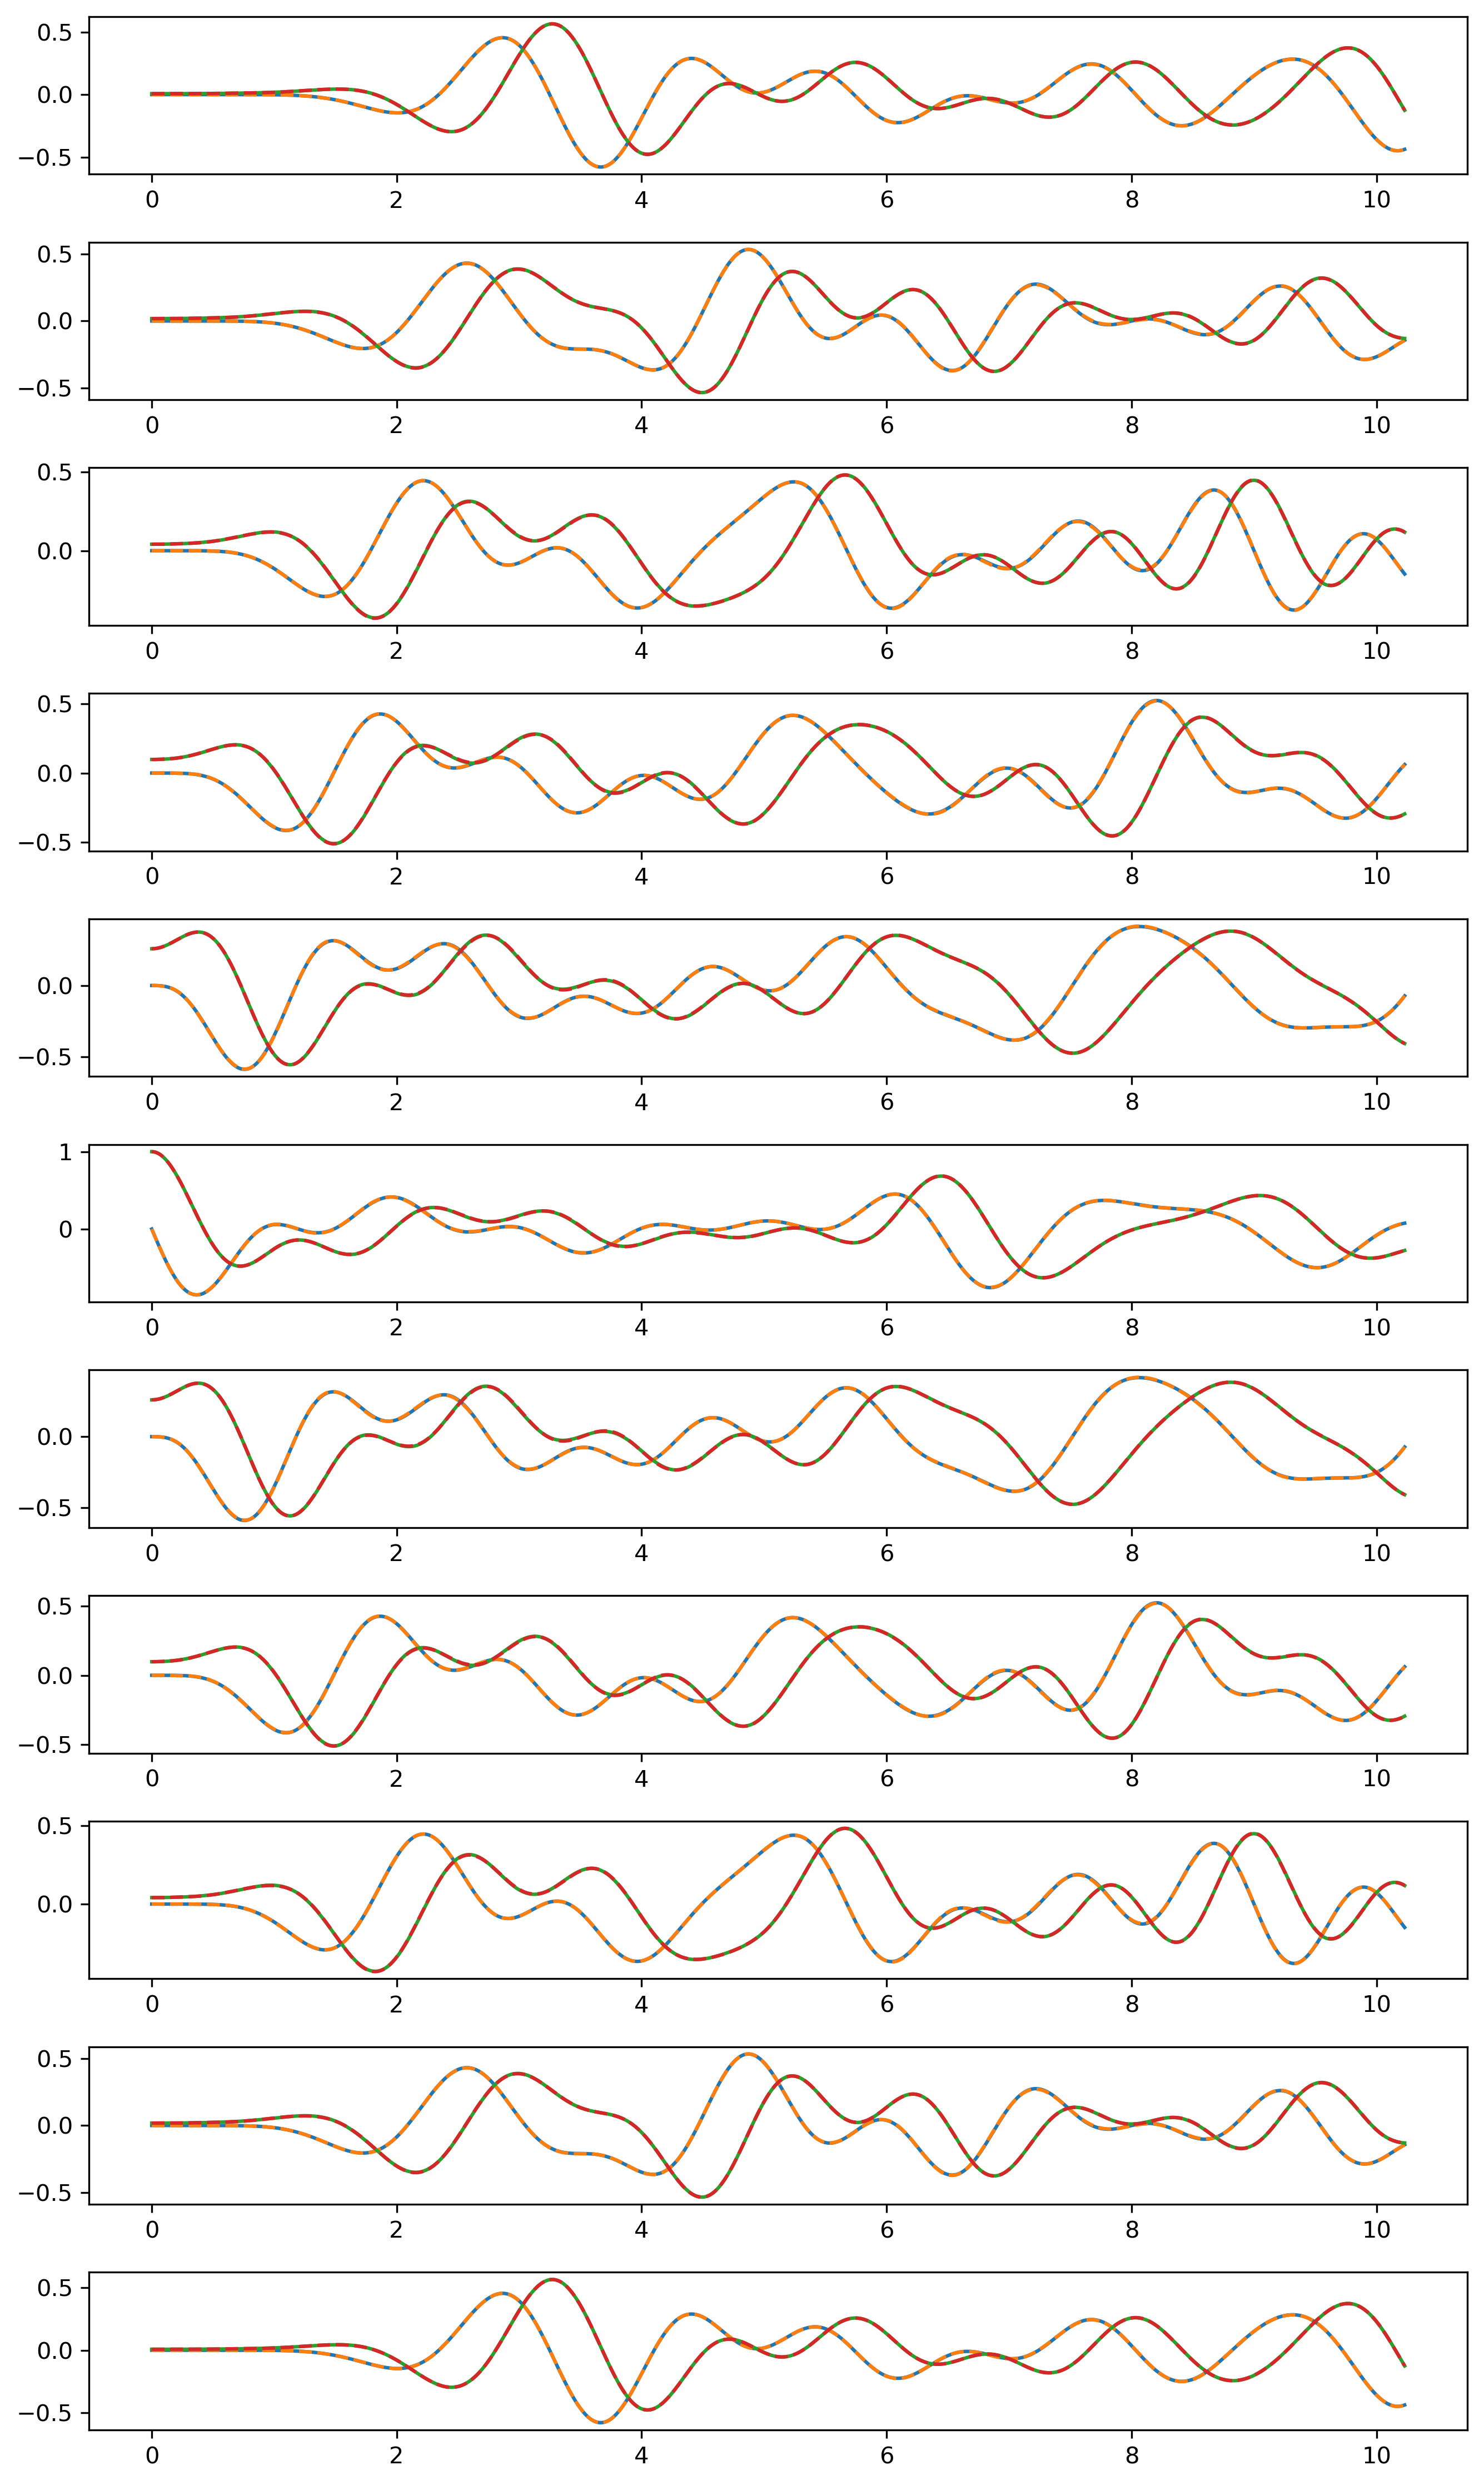

In [33]:
fig, axs = plt.subplots(nrows=D, figsize=(9,15), dpi=300)

D_list = np.arange(D)

for i,item in enumerate(D_list):
    axs[i].plot(ts, np.imag(func_vals[:,item]), '-')
    axs[i].plot(ts, np.imag(func_interp[:,item]), '--')
    axs[i].plot(ts, np.real(func_vals[:,item]), '-')
    axs[i].plot(ts, np.real(func_interp[:,item]), '--')
    #axs[i].set_xlim(0,0.2)

fig.tight_layout()

plt.show()